In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Process:
    def __init__(self, array):
        self.processArr = array
        self.averageWaitingTime = 0
        self.totalTime = 0
    def calculateAverageWaitingTime(self):
        sum = 0
        for task in self.processArr:
            sum += task.waitingTime
        return sum/len(self.processArr)
    def to_dataFrame(self):
        data = []
        for task in self.processArr:
            data.append({
                'Process': task.processChar,
                'Arrival': task.arrivalTime,
                'Burst': task.burstTime,
                'Completion': task.completionTime,
                'Waiting': task.waitingTime,
                'Turn Around': task.turnAroundTime
            })
        return pd.DataFrame(data)
        
class Task:
    def __init__(self, processChar, burstTime, arrivalTime):
        self.processChar = processChar
        self.burstTime = burstTime
        self.arrivalTime = arrivalTime
        self.completionTime = 0
        self.turnAroundTime = 0
        self.waitingTime = 0
    def calculateAttributes(self, time):
        self.completionTime = time
        self.turnAroundTime = self.completionTime - self.arrivalTime
        self.waitingTime = self.turnAroundTime - self.burstTime
    def incrementWait(self):
        self.waitingTime += 1
        return self.waitingTime
    def __repr__(self):  # Or use __str__ for a similar effect
        return f"{{ Process: {self.processChar}, Burst Time: {self.burstTime}, Arrival Time: {self.arrivalTime}, Waiting Time: {self.waitingTime}, CompletionTime: {self.completionTime} Turn Around Time: {self.turnAroundTime} }}"

In [3]:
while True:
    try:
        quantProcess = int(input("Input how many process you will input: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")
        

taskChar = 'A'
taskArr = []

for x in range(quantProcess):
    print("Process " + taskChar)
    
    while True:
        try:
            bt = int(input("Input Burst Time: "))
            break
        except:
            print("Please input integers!!!")
            
    while True:
        try:
            at = int(input("Input Arrival Time: "))
            break
        except:
            print("Please input integers!!!")
            
    taskArr.append(Task(taskChar, bt, at))
    taskChar = chr(ord(taskChar) + 1)
    
finalProcess = Process(taskArr)

Input how many process you will input:  5


Process A


Input Burst Time:  9
Input Arrival Time:  7


Process B


Input Burst Time:  11
Input Arrival Time:  2


Process C


Input Burst Time:  15
Input Arrival Time:  2


Process D


Input Burst Time:  3
Input Arrival Time:  6


Process E


Input Burst Time:  4
Input Arrival Time:  5


In [4]:
def printTasks(Object):
    for obj in Object.processArr:
        print(obj)
        
printTasks(finalProcess)

{ Process: A, Burst Time: 9, Arrival Time: 7, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: B, Burst Time: 11, Arrival Time: 2, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: C, Burst Time: 15, Arrival Time: 2, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: D, Burst Time: 3, Arrival Time: 6, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: E, Burst Time: 4, Arrival Time: 5, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }


In [5]:
def startProcess(Object):
    
    Object.processArr.sort(key=lambda p: p.arrivalTime)
    startTime = time.time()
    
    for task in Object.processArr:
        
        currTime = int(time.time() - startTime)

        try: 
            while currTime < task.arrivalTime:
                print(currTime, end="s\n")
                time.sleep(1)
                currTime = int(time.time() - startTime)
        except:
            print("Something is wrong")

        burstStart = task.burstTime
        while burstStart >= 0:
            currTime = int(time.time() - startTime)
            print(currTime, end="s\n")
            print(task.processChar, burstStart, sep=" - ")
            burstStart -= 1
            if burstStart < 0: 
                task.calculateAttributes(int(time.time() - startTime))
            else:
                time.sleep(1)

    Object.totalTime = time.time() - startTime
    Object.processArr.sort(key=lambda p: p.processChar)

startProcess(finalProcess)

0s
1s
2s
B - 11
3s
B - 10
4s
B - 9
5s
B - 8
6s
B - 7
7s
B - 6
8s
B - 5
9s
B - 4
10s
B - 3
11s
B - 2
12s
B - 1
13s
B - 0
13s
C - 15
14s
C - 14
15s
C - 13
16s
C - 12
17s
C - 11
18s
C - 10
19s
C - 9
20s
C - 8
21s
C - 7
22s
C - 6
23s
C - 5
24s
C - 4
25s
C - 3
26s
C - 2
27s
C - 1
28s
C - 0
28s
E - 4
29s
E - 3
30s
E - 2
31s
E - 1
32s
E - 0
32s
D - 3
33s
D - 2
34s
D - 1
35s
D - 0
35s
A - 9
36s
A - 8
37s
A - 7
38s
A - 6
39s
A - 5
40s
A - 4
41s
A - 3
42s
A - 2
43s
A - 1
44s
A - 0


In [6]:
df = finalProcess.to_dataFrame()
print(df)

  Process  Arrival  Burst  Completion  Waiting  Turn Around
0       A        7      9          44       28           37
1       B        2     11          13        0           11
2       C        2     15          28       11           26
3       D        6      3          35       26           29
4       E        5      4          32       23           27


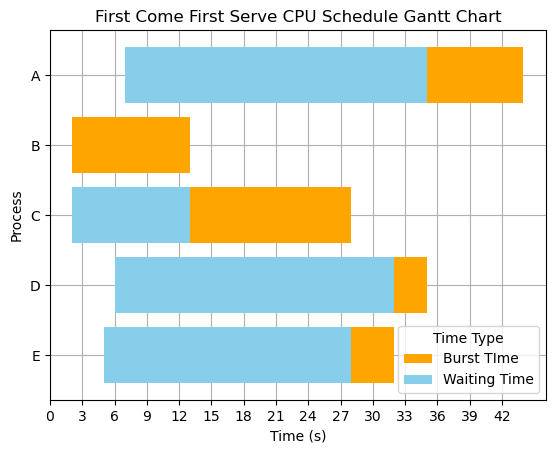

Average Waiting Time: 17.6s
Total Time: 44


In [7]:
fig, gnt = plt.subplots()

plt.barh(y=df['Process'], width=df['Burst'], left=df['Arrival'] + df['Waiting'], color="orange", label="Burst TIme", zorder=3)
plt.barh(y=df['Process'], width=df['Waiting'], left=df['Arrival'], color="skyblue", label="Waiting Time", zorder=3)

plt.title("First Come First Serve CPU Schedule Gantt Chart")

plt.gca().invert_yaxis()

gnt.grid(True, zorder=1)

gnt.set_ylabel("Process")
gnt.set_xlabel("Time (s)")

ticks = range(0, int(finalProcess.totalTime), 3)
gnt.set_xticks(ticks)
gnt.set_xticklabels(ticks, minor=False, rotation=0, fontsize=None)

plt.legend(title="Time Type")

plt.savefig(fname="Plot Figures/NP_FCFS", bbox_inches="tight", pad_inches=0.3, transparent=False)
plt.show()

print("Average Waiting Time", finalProcess.calculateAverageWaitingTime(), sep=": ", end="s\n")
print("Total Time", int(finalProcess.totalTime), sep=": ")